## Problema de los puentes de Königsberg 

Alberto Josué Ortiz Rosales                                  17-Mar-22

En la ciudad de Königsberg, se encuentra el río Pregolia. El río divide a la ciudad en cuatro regiones distintas, las cuales están conectadas por 7 puentes. ¿Es posible recorrer todas las regiones empezando desde cualquier región, pasando por todos los puentes una sola vez y regresar al punto de partida?

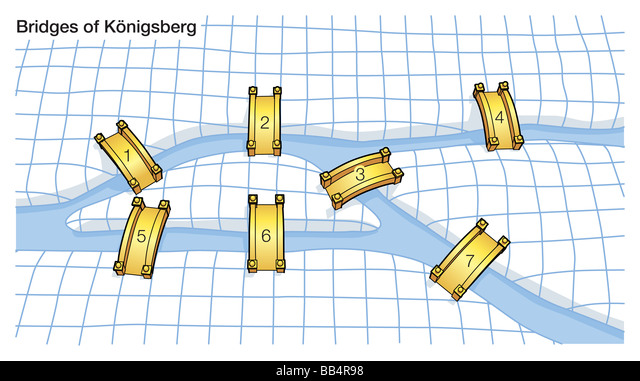

### Método 1  Fuerza Bruta

Consiste en probar cada uno de los distintos recorridos que pueden realizarse y encontar si es posible recorrer todos los puentes una sola vez.

### Método 2 Euler

Para poder resolver el problema, se abstrajo el mapa de la ciudad de Köningdberg en la siguiente representación:

- Cada región es representada por un nodo.
- Los puentes son las aristas que conectan los nodos.
- Contar el numero de puentes (aristas) de cada nodo.
- Contar las veces que se puede pasar por los nodos (impar n/2, par n/2 + 1).
- Se suman todas las visitas a nodos.
- Si la suma es uno menos o igual que el número de puentes más uno entonces se puede encontrar un camino.
- Si la suma es 1 menos que el número de puentes más uno entonces se debe empezar por un nodo con un número par de puentes.
- Si la suma es igual al número de puentes más 1 entonces se empieza por un nodo impar.
- De lo contrario el camino es imposible de realizar.

Como se observa en el mapa la isla que se encuentra entre el río es la única por la cual se conectan 5 puentes, mientras que las demás regiones solo tienen 3 puentes.

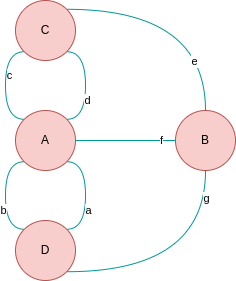

Euler concluye:

Que si un nodo tiene un numero par de vertices pueden existir 2 casos:

- El nodo es el punto de incio por lo tanto tiene que ser el punto de llegada.

- Si no es el punto de partida entonces solo se puede pasar por el una sola vez.
        
Ejemplo cuando se tienen un nodo con 4 aristas.

- Si se toma como punto de partida, las veces que se visita ese nodo serán 3 (n/2 + 1 veces).
- Si no es el punto de partida entonces se pasará por el 2 veces. (n/2 veces )

- Es imposible si hay un número impar de nodos con un número impar de aristas.
- Si hay un número de nodos mayor a 4 con un número de aristas impar entonces es imposible el viaje.

A la propiedad de una gráfica en la cual se puede encontrar un camino por el cual se pase por una arista solo una vez y se vuelva al origen de la partida se le conoce como "ciclo euleriano"

# Fruchterman Reingold

Alberto Josué Ortiz Rosales    18 - Mar - 2022

Pertenece a los algoritmos "force-directed". Calculan la representación de la gráfica basandose solamente en la estructura. Estas gráficas creadas con estos algorithmos exhiben simetrías. Se asume que las gráficas son simples, indirectas y estan conectadas por rectas. Estos algorithmos se basan en el cálculo de fuerzas similares a la ley de Hooke.

Este tipo de algoritmos define una función objetivo la cual representa la energía de la representación. Está definida tal que la representación corresponda a la estructura de menor energía.

Estos algoritmos funcionan bien para gráficas de tamaño pequeño ( aprox cientos de vértices) y están restringidas para la geometría Euclideana $R^2$, $R^3$, $R^n$

Fuerza del resorte (Eades, 84):

$c_1 * log\frac{d}{c_2}$

Donde $d$ es la longitud y $c_1$ y $c_2$ son constantes.

Fuerza de repulsión: 

$c_3/d^2$

**Pseudo código**

**Spring**(G):\
&nbsp;&nbsp;&nbsp;Colocar los vértices de manera aleatoria.\
&nbsp;&nbsp;&nbsp;For 0 to n:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcular las fuerzas de cada vértice. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Mover el vértice $c_4 *$ (fuerza).\
&nbsp;&nbsp;&nbsp;Dibujar la gráfica.







El algorithmo de Fruchterman y Reingold trata a los vértices como particulas atómicas o cuerpos celestiales. Definiendo las siguientes fuerzas:

- Fuerza de atracción:

$f_a(d) = d^2/k$

- Fuerza de repulsión:

$f_r(d) = - k^2/d$

Donde $k$ es la distancia óptima entre dos vértices.

$k=C \sqrt{\frac{área}{n\quad vértices}}$

El algoritmo de Fruchterman y Reingold es similar al de Eades, pero agrega el termino de "enfriamiento" que controla el ajuste de los vértices haciendo ajustes más pequeños.

En cada iteración de calculan $O(|E|)$ fuerzas de atracción y $O(|V^2|)$ fuerzas de repulsión. Para eliminar el tiempo cuadratico se propone que se ignoren las fuerzas de vértices alejados. 


**Pseudo código**

```
area := W*L;
G := (V, E) //asigna posiciones aleatorias iniciales
k := sqrt(area/|V|)

def fa(x):
  return x^2/k;

def fr(x): 
  return k^2/x;

for i:= 1 to n:
  // Fuerzas repulsivas.
  for v in V:
    if (u != v):
      diff := v.pos - u.pos; // vector diferencia entre dos vectores
      v.disp := v.disp + (diff /|diff|) * fr(|diff|);
  // Fuerzas de atracción.
  for e in E:
    diff := e.v.pos - e.u.pos;
    e.v.disp := e.v.disp - (diff /|diff|) * fa(|diff|);
    e.u.disp := e.u.disp - (diff /|diff|) * fa(|diff|);

  // Limite del desplazamiento.
  for v in V:
    v.pos := v.pos + (v.disp/ |v.disp|) * min(v.disp, t); // t es la temperatura.
    v.pos.x := min(W/2, max(-W/2, v.pos.x));
    v.pos.y := min(L/2, max(-L/2, v.pos.y));
  // Reducir la temperatura
  t := cool(t)






```

[Simulador de algorítmos "force directed"](https://www1.pub.informatik.uni-wuerzburg.de/demos/forceDirected.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


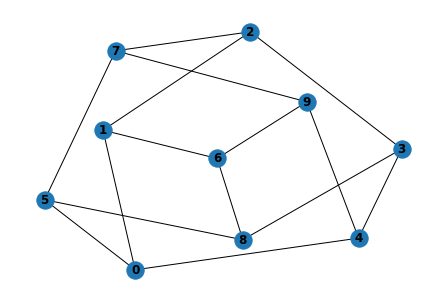

In [2]:
G = nx.petersen_graph()
# Demostación de la vizualicación de una gráfica usando el algorítmo Fruchterman 
# Reingold   (modificar el número de iteraciones)
pos = nx.spring_layout(G, iterations = 10000, seed= 123)
#pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos,with_labels=True, font_weight='bold')


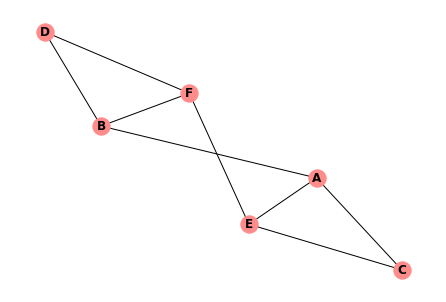

In [12]:
G = nx.Graph()
# Gráfica vista en clase
G.add_edges_from([('A','B'),('B','F'),('B','D'),('D','F'),('E','F'),('E','A'), ('A','C'),('E','C')])
pos = nx.spring_layout(G, iterations = 100)
nx.draw(G, pos,with_labels=True, font_weight='bold', node_color ='#FF8B8B')

## Referencia

- Tamassia, R (2013) _"Handbook of Graph Drawing and Visualization"._ Chapman and Hall. Chapter 12.